# MNIST를 이용한 CNN 분류모델

In [1]:
# 라이브러리, MNIST 데이터셋 로드
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# training set, validation set 구성
x_val, y_val = x_train[50000:,:], y_train[50000:]
x_train, y_train = x_train[:50000,:], y_train[:50000]

In [3]:
# MNIST 데이터 표준화
mean = np.mean(x_train, axis=0)
print(mean.shape)
std = np.std(x_train)
print(std)
x_train_center = (x_train-mean)/std
x_val_center = (x_val-mean)/std
x_test_center = (x_test-mean)/std
print(x_train_center.shape, x_val_center.shape, x_test_center.shape)

(28, 28)
78.6661972212754
(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)


In [4]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Sequential 모델 구축
from tensorflow.keras import layers, models
model = models.Sequential()

# layer 추가
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())

# dense layer에 flatten 결과 추가
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [8]:
x_train_c = x_train_center.reshape(-1, 28,28,1)
x_val_c = x_val_center.reshape(-1,28,28,1)
x_test_c = x_test_center.reshape(-1,28,28,1)
# 학습
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot))

Epoch 1/20
782/782 [==============================] - 18s 11ms/step - loss: 0.1369 - acc: 0.9579 - val_loss: 0.0464 - val_acc: 0.9866
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0502 - acc: 0.9843 - val_loss: 0.0429 - val_acc: 0.9887
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0341 - acc: 0.9894 - val_loss: 0.0457 - val_acc: 0.9873
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0281 - acc: 0.9915 - val_loss: 0.0354 - val_acc: 0.9911
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0247 - acc: 0.9923 - val_loss: 0.0400 - val_acc: 0.9907
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0405 - val_acc: 0.9889
Epoch 7/20
782/782 [==============================] - 8s 10ms/step - loss: 0.0177 - acc: 0.9944 - val_loss: 0.0357 - val_acc: 0.9898
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss

In [9]:
model.layers[0]

In [22]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[ 2.91103125e-02, -1.65277556e-01, -5.72902225e-02,
           -3.75944264e-02, -1.25482276e-01,  1.41394198e-01,
            8.86374786e-02, -2.47363485e-02, -1.19257264e-01,
            2.41573323e-02, -1.10146962e-02, -3.00953332e-02,
            5.90611063e-02, -3.84774655e-02, -6.96754977e-02,
            6.07897788e-02,  3.65320891e-02, -3.67166586e-02,
            4.79898453e-02, -5.93879670e-02,  7.67682716e-02,
           -3.01590823e-02, -3.96537818e-02,  2.78884172e-02,
            8.34249146e-03, -8.56683627e-02, -1.22852437e-02,
            9.49951005e-04,  2.29674652e-02,  1.18120927e-02,
            4.29194607e-02,  1.61981061e-02]],
 
         [[-9.39962938e-02, -1.63222149e-01, -8.66172612e-02,
           -1.59582205e-03,  4.11790274e-02, -8.66811052e-02,
           -5.04354760e-02, -3.72858010e-02, -5.14316373e-02,
            4.80446294e-02,  3.69990524e-03, -1.22074135e-01,
         

In [11]:
model.layers[0].weights[0].shape

TensorShape([5, 5, 1, 32])

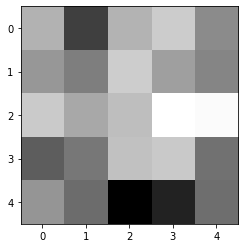

In [12]:
plt.imshow(model.layers[0].weights[0][:,:,0,0], cmap='gray')

In [13]:
conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)
conv2d_out = conv2d_1.predict(x_train_c[[0]])
print(x_train_c.shape, conv2d_out.shape)

(50000, 28, 28, 1) (1, 24, 24, 32)


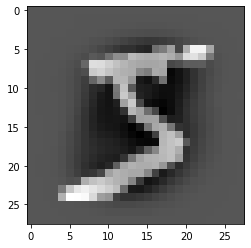

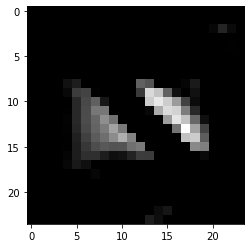

In [14]:
plt.imshow(x_train_c[0,:,:,0], cmap='gray')  # 원본 image
plt.figure()
plt.imshow(conv2d_out[0,:,:,1],cmap='gray')  # convolution image

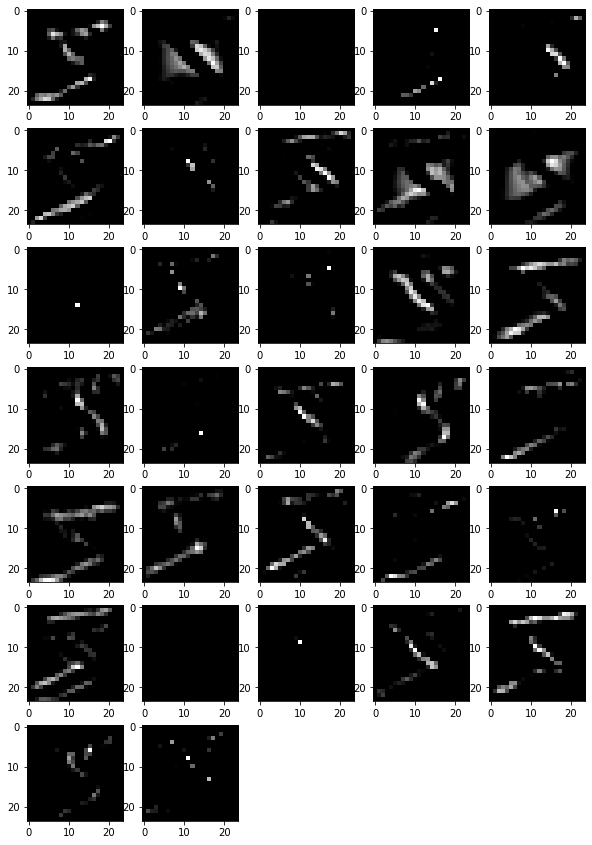

In [15]:
# 32개 필터 적용 검토
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

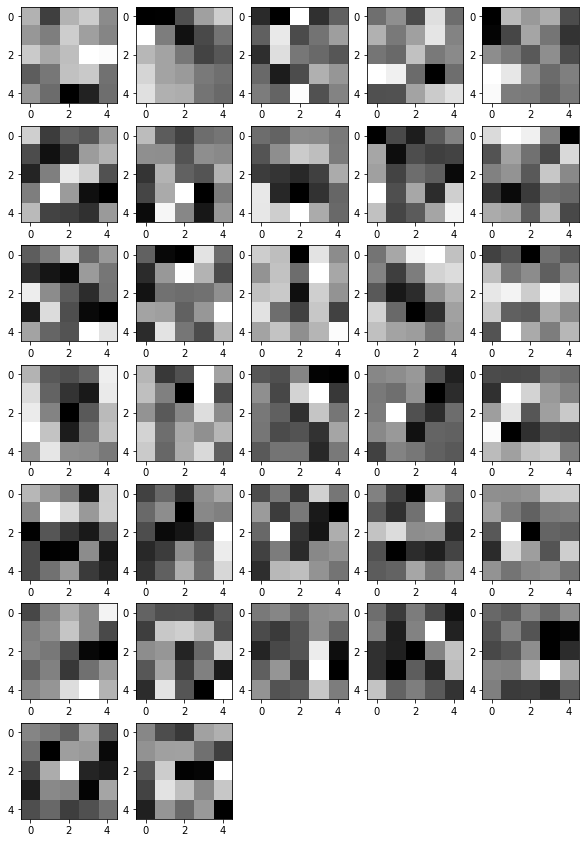

In [16]:
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(model.layers[0].kernel[:,:,0,i], cmap='gray')
plt.show()

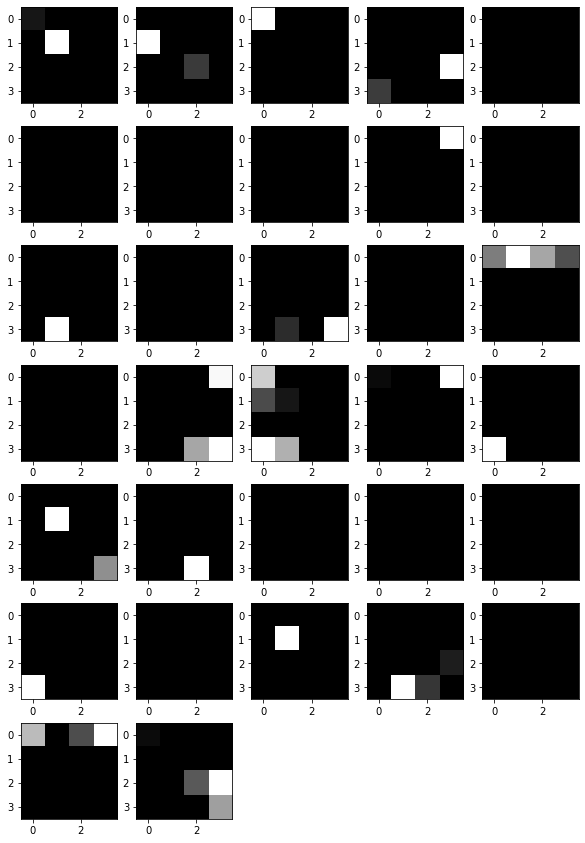

In [17]:
maxpool_3 = models.Model(inputs=model.input, outputs=model.layers[3].output)
maxpool_out = maxpool_3.predict(x_train_c[[0]])
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')
plt.show()

In [18]:
flat = models.Model(inputs=model.input, outputs=model.layers[4].output)
flat_out = flat.predict(x_train_c[[0]])
flat_out

array([[0.18063493, 0.        , 0.81856734, ..., 0.        , 0.        ,
        0.33884263]], dtype=float32)

In [19]:
flat_df = pd.Series(flat_out[0])
flat_df.describe()

count    1024.000000
mean        0.067462
std         0.294376
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.326930
dtype: float64

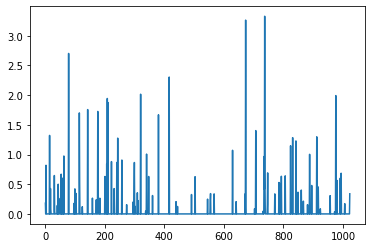

In [20]:
flat_df.plot()